# Ford GoBike System Data
## by Hamid Alhijaily

## Preliminary Wrangling

> This dataset gathered from people who used Ford GoBike in San Francisco

In [49]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import requests
import zipfile
import datetime
%matplotlib inline

In [50]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [51]:
df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

In [52]:
#overview the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [53]:
#Check if there is a duplicate data
df.duplicated().sum()

0

In [54]:
df.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 15187
The Embarcadero at Sansome St                                      13664
San Francisco Caltrain (Townsend St at 4th St)                     12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12055
Market St at 10th St                                               11960
Montgomery St BART Station (Market St at 2nd St)                   11334
Berry St at 4th St                                                 10956
Powell St BART Station (Market St at 4th St)                       10142
Howard St at Beale St                                               9926
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7987
Embarcadero BART Station (Beale St at Market St)                    7649
2nd St at Townsend St - Coming Soon                                 6605
3rd St at Townsend St                              

In [55]:
df.member_birth_year=df.member_birth_year.apply(lambda x : 2017-x)

In [56]:
df.rename(columns={'member_birth_year':'member_age'},inplace=True)

In [57]:
#drop missing value from member_birth_year and member_gender
df.dropna(inplace=True)

In [58]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_age                 453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


In [59]:
df.member_gender.value_counts()

Male      348318
Female     98542
Other       6299
Name: member_gender, dtype: int64

In [61]:
df.duration_sec.nunique()

7972

In [62]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  453159.000000     453159.000000           453159.000000   
mean      832.934014         95.046132               37.771968   
std      2525.280717         84.578497                0.084914   
min        61.000000          3.000000               37.317298   
25%       364.000000         25.000000               37.773492   
50%       556.000000         67.000000               37.782411   
75%       838.000000        138.000000               37.795392   
max     86252.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            453159.000000   453159.000000         453159.000000   
mean               -122.364093       91.854907             37.772090   
std                   0.104240       83.053529              0.084811   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       24.000000             37.773793   
50%                -122.398525       66.000000             37.782411   
75%                -122.391034      134.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id     member_age  
count          453159.000000  453159.000000  453159.000000  
mean             -122.363274    1680.628285      36.595213  
std                 0.103723     972.828314      10.513488  
min              -122.444293      10.000000      18.000000  
25%              -122.409851     795.000000      29.000000  
50%              -122.397405    1739.000000      34.000000  
75%              -122.391034    2530.000000      43.000000  
max              -121.874119    3733.000000     131.000000

In [18]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  453159.000000     453159.000000           453159.000000   
mean      832.934014         95.046132               37.771968   
std      2525.280717         84.578497                0.084914   
min        61.000000          3.000000               37.317298   
25%       364.000000         25.000000               37.773492   
50%       556.000000         67.000000               37.782411   
75%       838.000000        138.000000               37.795392   
max     86252.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            453159.000000   453159.000000         453159.000000   
mean               -122.364093       91.854907             37.772090   
std                   0.104240       83.053529              0.084811   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       24.000000             37.773793   
50%                -122.398525       66.000000             37.782411   
75%                -122.391034      134.000000             37.795392   
max                -121.874119      340.000000             37.880222   

       end_station_longitude        bike_id     member_age  
count          453159.000000  453159.000000  453159.000000  
mean             -122.363274    1680.628285      36.595213  
std                 0.103723     972.828314      10.513488  
min              -122.444293      10.000000      18.000000  
25%              -122.409851     795.000000      29.000000  
50%              -122.397405    1739.000000      34.000000  
75%              -122.391034    2530.000000      43.000000  
max              -121.874119    3733.000000     131.000000

### What is the structure of your dataset?

data contain 453159 rides with 15 feature there are nine numeric columns and two categorical columns

### What is/are the main feature(s) of interest in your dataset?

the main feature is duration I want to know which factor affects the duration 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
user_type: I want to does it make difference in term of duration if the user is a customer or not<br>
start_time: I think time will play a big role in the duration



## Univariate Exploration


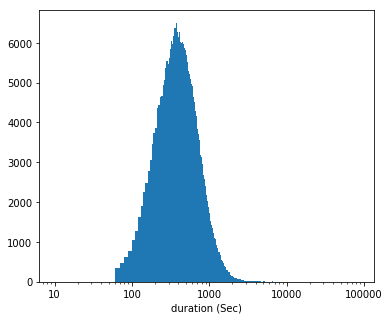

In [20]:
bins = np.arange(0, df['duration_sec'].max(),10)
plt.figure(figsize=[6, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 1e4, 1e5], [10, 100, 1000, 10000, 100000])
plt.xlabel('duration (Sec)')
plt.show()

the plot distribution is almost Normal strangely there is jump and under 100 seconds maybe because people want to just to try the bike.

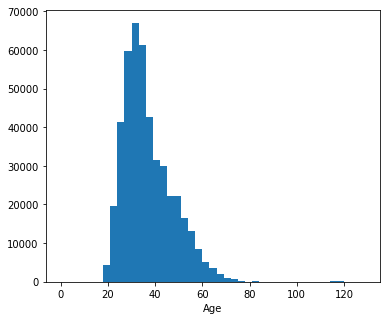

In [65]:
bins = np.arange(0, df['member_age'].max(),3)
plt.figure(figsize=[6, 5])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('Age')
plt.show()

the age is skew to the right and there are outlires will be investigate more further.

In [66]:
df_age=df[df.member_age>100]

In [67]:
df_age.rename(columns={"member_age":'member_birth_year'},inplace=True);

C:\Users\shlazar\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [68]:
df_age.member_birth_year=df_age.member_birth_year.apply(lambda x : 2017-x);

C:\Users\shlazar\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


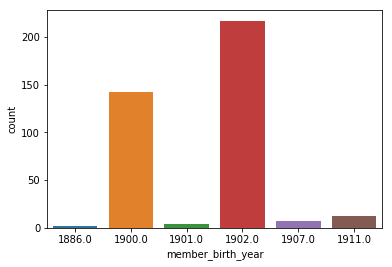

In [69]:
sns.countplot(data=df_age,x='member_birth_year')

it is safe to drop any age under 100 years old because by logic its 100% these ages are not real


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

the plot distribution of duration is almost Normal strangely there is jump and under 100 seconds maybe because people want just to try the bike. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

there were an illogical range of age, for example, there is the birth year of 1886 I am pretty sure user wanted to put 1986 and there a lot of 1900 and 1902 which is not correct and it's better to drop them



## Bivariate Exploration


what is the relation between subscribtion and other feature 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_age                 453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


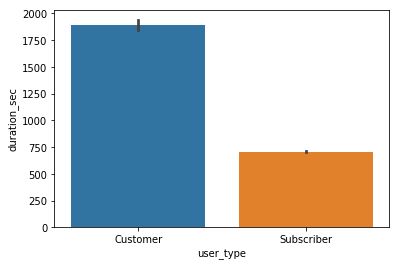

In [70]:
sns.barplot(data=df,x='user_type',y='duration_sec')


subscriber average duration is 1000 second below the average Customer duration. I will check the average age of each member to find if the age play any role in the different between user type


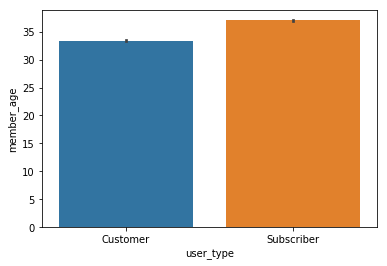

In [71]:
sns.barplot(data=df,x='user_type',y='member_age')

there is a small difference in age for user type so age does not have an impact on the big difference in duration between the user type

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

the average duration for a customer is 1800 seconds and 750 seconds for a subscriber. I was confused because I thought the subscriber duration would be higher but it is the opposite. So, I went to their website to investigate more, and I found that the price for a single ride is 2 dollar for a customer for 30 minutes, then it charges you 3 dollar for every 15 minutes. 30 minute is 1800 seconds so the customer wants to use every penny he paid. On the other hand, a subscriber pays 15 dollars per month and can use the bike for free for 45 minutes, after that he is charged 3$ for each 15 minutes. So a subscriber-only uses it to reach the destination.


#### conclusion:
San Francisco is a tourist city which means most of the customers are tourists, so they pick the normal ride for 30 minute and the subscriber are people who work in San Francisco and it's efficient for them to pick subscribe version. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I looked into age distribution with user type and there is no big difference between the two type



## Multivariate Exploration


In [44]:
df['start_time']=pd.to_datetime(df['start_time'])

In [45]:
df['start_time'][0].month
df['month']=df['start_time'].apply(lambda x :x.month)

C:\Users\shlazar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


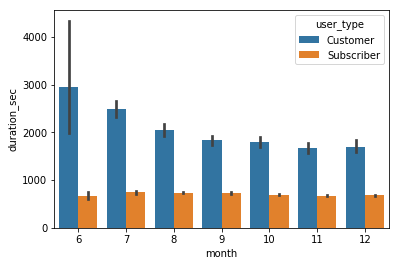

In [47]:
sns.barplot(data=df,x='month',y='duration_sec',hue='user_type')

there is a jump from june(6)to August(8) and steady duration for subscriber


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

the average duration in summer jumped because San Francisco is a tourist city that why it has jumped from June to august while subscriber are a worker who stay in San Francisco al the time and it effect for them to subscribe


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!